In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from joblib import dump, load
import pandas as pd 
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path_test = "/content/drive/MyDrive/jashan/abisheksudarshan-customer-segmentation/test.csv"
path_train = "/content/drive/MyDrive/jashan/abisheksudarshan-customer-segmentation/train.csv"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df_train = pd.read_csv(path_train)  # issue loading the data into x_test and y test, 
df_test = pd.read_csv(path_test)  # issue loading the data into x_test and y test, 
df_test = df_test.dropna()
df_train = df_train.dropna()

print(df_train.head())
print()
print(df_test.head())

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  462809    Male           No   22        No  Healthcare              1.0   
2  466315  Female          Yes   67       Yes    Engineer              1.0   
3  461735    Male          Yes   67       Yes      Lawyer              0.0   
5  461319    Male          Yes   56        No      Artist              0.0   
6  460156    Male           No   32       Yes  Healthcare              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
5        Average          2.0  Cat_6            C  
6            Low          3.0  Cat_6            C  

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare     

In [21]:
frames = [df_train, df_test]
df = pd.concat(frames)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,NaN
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [22]:
df = df.drop('ID', axis=1)

In [23]:
print(df.isnull().values.ravel().sum())
df = df.dropna() 
print(df.isnull().values.ravel().sum())

df

2154
0


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [24]:
y = df['Segmentation']
df = df.drop('Segmentation', axis=1)
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [25]:
# creating instance of labelencoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column

df["Gender"] =  labelencoder.fit_transform(df["Gender"] )
df["Ever_Married"] =  labelencoder.fit_transform(df["Ever_Married"] )
df["Graduated"] =  labelencoder.fit_transform(df["Graduated"] )
df["Profession"] =  labelencoder.fit_transform(df["Profession"] )
df["Spending_Score"] =  labelencoder.fit_transform(df["Spending_Score"] )
#df["Var_1"] =  labelencoder.fit_transform(df["Var_1"] )

In [26]:
df.isnull().values.ravel().sum()
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,Cat_4
2,0,1,67,1,2,1.0,2,1.0,Cat_6
3,1,1,67,1,7,0.0,1,2.0,Cat_6
5,1,1,56,0,0,0.0,0,2.0,Cat_6
6,1,0,32,1,5,1.0,2,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,Cat_6
8064,1,0,35,0,4,3.0,2,4.0,Cat_4
8065,0,0,33,1,5,1.0,2,1.0,Cat_6
8066,0,0,27,1,5,1.0,2,4.0,Cat_6


It is a multi class classification task where “var_1” is a class label column having 3 categories as 
Cat_6: 65%, 
Cat_4: 13%, 
Other: 22%. 
There is a slight imblance in class distribution.

In [27]:
df['Var_1'] = df['Var_1'].replace(['Cat_1'], '0.22')
df['Var_1'] = df['Var_1'].replace(['Cat_2'], '0.22')
df['Var_1'] = df['Var_1'].replace(['Cat_3'], '0.22')
df['Var_1'] = df['Var_1'].replace(['Cat_4'], '0.13')
df['Var_1'] = df['Var_1'].replace(['Cat_5'], '0.22')
df['Var_1'] = df['Var_1'].replace(['Cat_6'], '0.65')
df['Var_1'] = df['Var_1'].replace(['Cat_7'], '0.22')

In [28]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,0.13
2,0,1,67,1,2,1.0,2,1.0,0.65
3,1,1,67,1,7,0.0,1,2.0,0.65
5,1,1,56,0,0,0.0,0,2.0,0.65
6,1,0,32,1,5,1.0,2,3.0,0.65
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,0.65
8064,1,0,35,0,4,3.0,2,4.0,0.13
8065,0,0,33,1,5,1.0,2,1.0,0.65
8066,0,0,27,1,5,1.0,2,4.0,0.65


In [45]:
print(y.isnull().values.ravel().sum())
y = y.dropna() 
print(y.isnull().values.ravel().sum())
y =  labelencoder.fit_transform(y )

y

0
0


array([3, 1, 1, ..., 3, 1, 1])

In [30]:
print("length of df ", (len(df)) )
print("length of y ", (len(y)) )


length of df  6665
length of y  6665


In [49]:
from sklearn.model_selection import train_test_split


# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(df,y , random_state=104, test_size=0.25, shuffle=True)

# printing out train and test sets

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train)
print('')
print('y_test : ')
print(y_test)


X_train : 
      Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
4809       1             0   19          0           5              1.0   
2542       1             1   43          0           5              6.0   
5014       0             1   85          1           7              0.0   
41         0             0   22          0           5              0.0   
744        0             1   35          1           5              1.0   

      Spending_Score  Family_Size Var_1  
4809               2          3.0  0.65  
2542               1          2.0  0.22  
5014               2          5.0  0.65  
41                 2          2.0  0.65  
744                2          3.0  0.65  

X_test : 
      Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
1988       0             1   40          1           0              1.0   
3879       1             1   86          0           7             13.0   
1986       1             1   39          1        

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)



In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten


In [34]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
model = Sequential()
model.add(Dense( 3, input_dim=9, activation='relu', return_sequences=True) )
#model.add(Dense(8,  activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
estimator = KerasRegressor(build_fn=baseline_model, epochs=30, batch_size=3, verbose=1)

history=estimator.fit(X_train,y_train)

TypeError: ignored

In [81]:
model = Sequential()
model.add(Dense(5, input_dim=9, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2, shuffle=False)

Epoch 1/100
50/50 - 1s - loss: 3.6407 - 1s/epoch - 23ms/step
Epoch 2/100
50/50 - 0s - loss: 2.6849 - 69ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 1.7379 - 101ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 1.3601 - 73ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 1.2911 - 74ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 1.2484 - 70ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 1.2195 - 71ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 1.1968 - 74ms/epoch - 1ms/step
Epoch 9/100
50/50 - 0s - loss: 1.1777 - 66ms/epoch - 1ms/step
Epoch 10/100
50/50 - 0s - loss: 1.1610 - 88ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 1.1459 - 68ms/epoch - 1ms/step
Epoch 12/100
50/50 - 0s - loss: 1.1319 - 71ms/epoch - 1ms/step
Epoch 13/100
50/50 - 0s - loss: 1.1184 - 68ms/epoch - 1ms/step
Epoch 14/100
50/50 - 0s - loss: 1.1050 - 73ms/epoch - 1ms/step
Epoch 15/100
50/50 - 0s - loss: 1.0927 - 70ms/epoch - 1ms/step
Epoch 16/100
50/50 - 0s - loss: 1.0814 - 66ms/epoch - 1ms/step
E

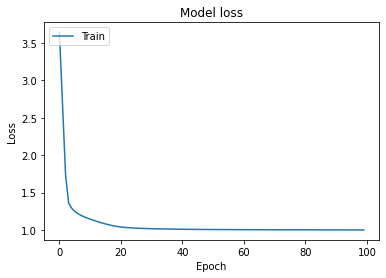

In [82]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [84]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)

53/53 [==============================] - 0s 3ms/step
